In [2]:
# import sys
# sys.path.append("..")
# from common_utils import DATA_HOME
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt

from svm import *   

np.random.seed(10)


In [3]:
# target function 
W = 3.65
B = 0.6
num_points = 20

### build dataset

In [4]:
# Generate random points
x = np.random.rand(num_points)
y = np.random.rand(num_points)
labels = []

# label the data points
for i in range(num_points):
    yhat = x[i] * W - B
    labels.append(1.) if yhat > y[i] else labels.append(-1.)

### Train SVM

In [5]:
weight, bias = 0., 0.
EPOCHS = 100
lr = 0.005

In [6]:
for e in range(EPOCHS):
    loss = 0.
    for i in range(num_points):
        yhat = predict(x[i], weight, bias)
        l, dw, db = compute_loss(x[i], yhat, labels[i], weight, lamb=0.0)
        loss += l
        weight -= dw * lr
        bias -= db * lr
    print(f"loss: {loss/num_points}, weight: {weight}, bias: {bias}")


loss: 0.9901860676898602, weight: 0.0417306086006033, bias: -0.030000000000000002
loss: 0.9637716307480927, weight: 0.08346121720120663, bias: -0.05999999999999999
loss: 0.937357193806325, weight: 0.12519182580180996, bias: -0.09000000000000001
loss: 0.9109427568645575, weight: 0.16692243440241328, bias: -0.12000000000000004
loss: 0.8845283199227906, weight: 0.20865304300301662, bias: -0.15000000000000005
loss: 0.8581138829810226, weight: 0.25038365160361997, bias: -0.18000000000000008
loss: 0.8316994460392554, weight: 0.2921142602042233, bias: -0.2100000000000001
loss: 0.8052850090974879, weight: 0.33384486880482667, bias: -0.24000000000000013
loss: 0.7788705721557203, weight: 0.37557547740543, bias: -0.27000000000000013
loss: 0.752456135213953, weight: 0.41730608600603336, bias: -0.30000000000000016
loss: 0.7260416982721853, weight: 0.4590366946066367, bias: -0.3300000000000002
loss: 0.699627261330418, weight: 0.50076730320724, bias: -0.3600000000000002
loss: 0.6732128243886505, weig

### visualize results

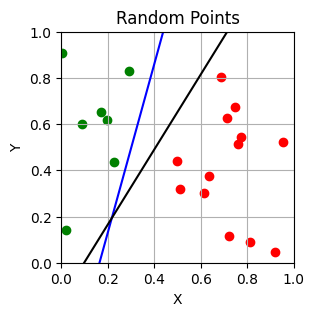

In [7]:
# Set figure size
plt.figure(figsize=(3, 3))  

# Plot the line
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line * W - B, color='blue', label='wx + b')
plt.plot(x_line, x_line * weight - bias, color='black', label='wx + b')

# Plot the data points with colors corresponding to their labels
for i in range(num_points):
    color = 'red' if labels[i] == 1. else 'green'
    plt.scatter(x[i], y[i], color=color)

# Plot the points
plt.title('Random Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()